# House Price Prediction 

## Problem Statement:

Predict the house price using different features which effecting the price of a House

## Data fields

Data fields

SalePrice : the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale.

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
%matplotlib inline
from scipy.stats import skew
from scipy.stats import uniform

from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer
# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore")

In [456]:
#Load the Data
dftrain=pd.read_csv("train (1).csv")
dftest=pd.read_csv("test (1).csv")

In [457]:
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [458]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [459]:
#Combine te dataframe for the purpose of preprocessing
df=dftrain.append(dftest,ignore_index=True)

In [460]:
dftrain.shape,dftest.shape,df.shape

((1460, 81), (1459, 80), (2919, 81))

# EDA

In [533]:
dftrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


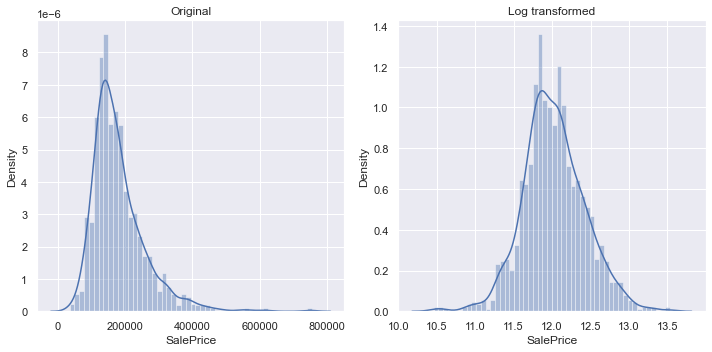

In [461]:
#Plotting the distribution of Saleprice column before and after applying log transformation
#We can see clearly it is in Gaussian distribution after applying log
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(dftrain.SalePrice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(dftrain.SalePrice), bins=50)
plt.title('Log transformed')

plt.tight_layout()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

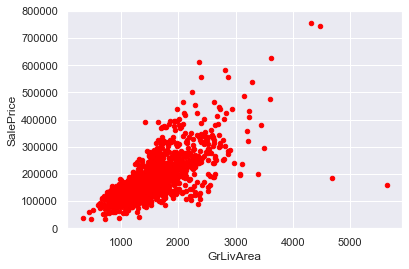

In [462]:
#Plotting relationship between gardernliving area and SalePrice with scatterplot
var = 'GrLivArea'
data = pd.concat([dftrain["SalePrice"], dftrain[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000),color="Red")

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

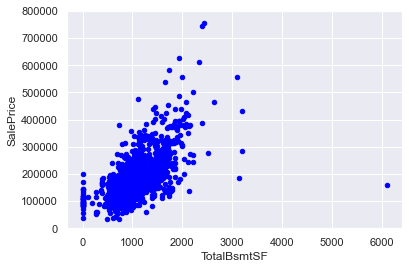

In [463]:
#Plotting relationship between TotalBasement area and SalePrice with scatterplot
var = 'TotalBsmtSF'
data = pd.concat([dftrain["SalePrice"], dftrain[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000),color="blue")

<AxesSubplot:>

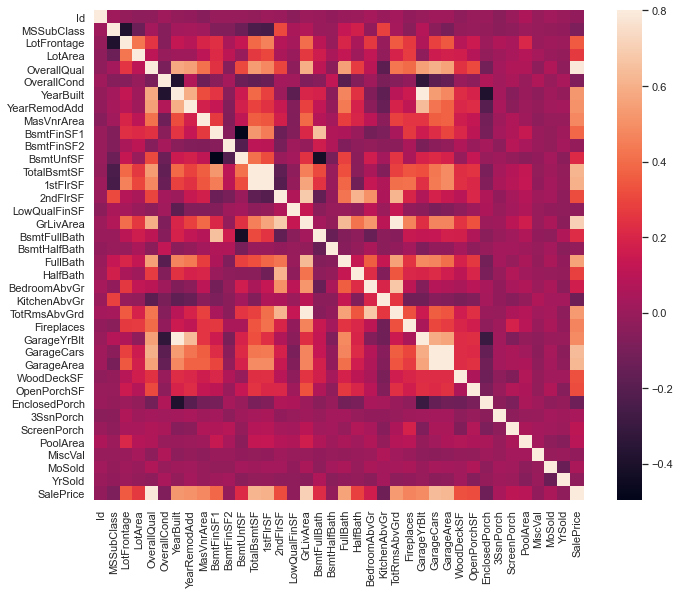

In [464]:
#Plot correlation matrix for train data
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)

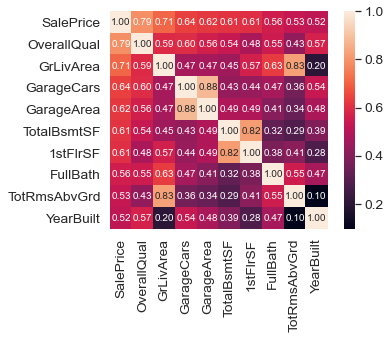

In [465]:
#Lookind at heatmap having heatmap with many features is little confusing so i'am taking top 10 correlated features
#from correlation matrix
import numpy as np
#saleprice correlation matrix
corr_matrix=dftrain.corr()
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dftrain[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

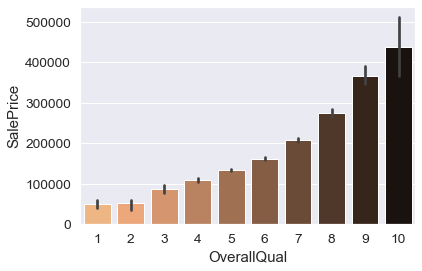

In [466]:
#Barplot showing average SalPrice of different Qualities of House
sns.barplot(x=dftrain.OverallQual,y="SalePrice",data=dftrain,palette='copper_r')

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

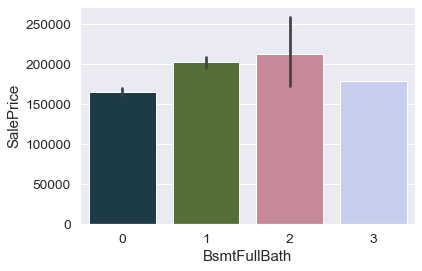

In [467]:
sns.barplot(x=dftrain.BsmtFullBath,y="SalePrice",data=dftrain,palette="cubehelix")

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

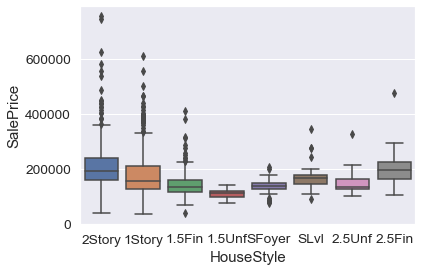

In [468]:
#Boxplot for checking outiers for different HouseStyles
sns.boxplot(x=dftrain.HouseStyle,y="SalePrice",data=dftrain)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

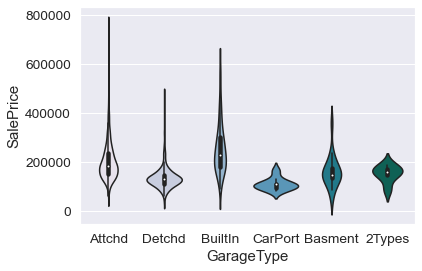

In [469]:
#PLot Violinplot for checking outliers
sns.violinplot(x=dftrain.GarageType,y="SalePrice",data=dftrain,palette='PuBuGn')
#Attchd type Garage having more outliers

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

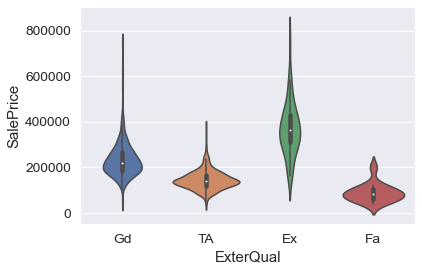

In [470]:
sns.violinplot(x=dftrain.ExterQual,y="SalePrice",data=dftrain)

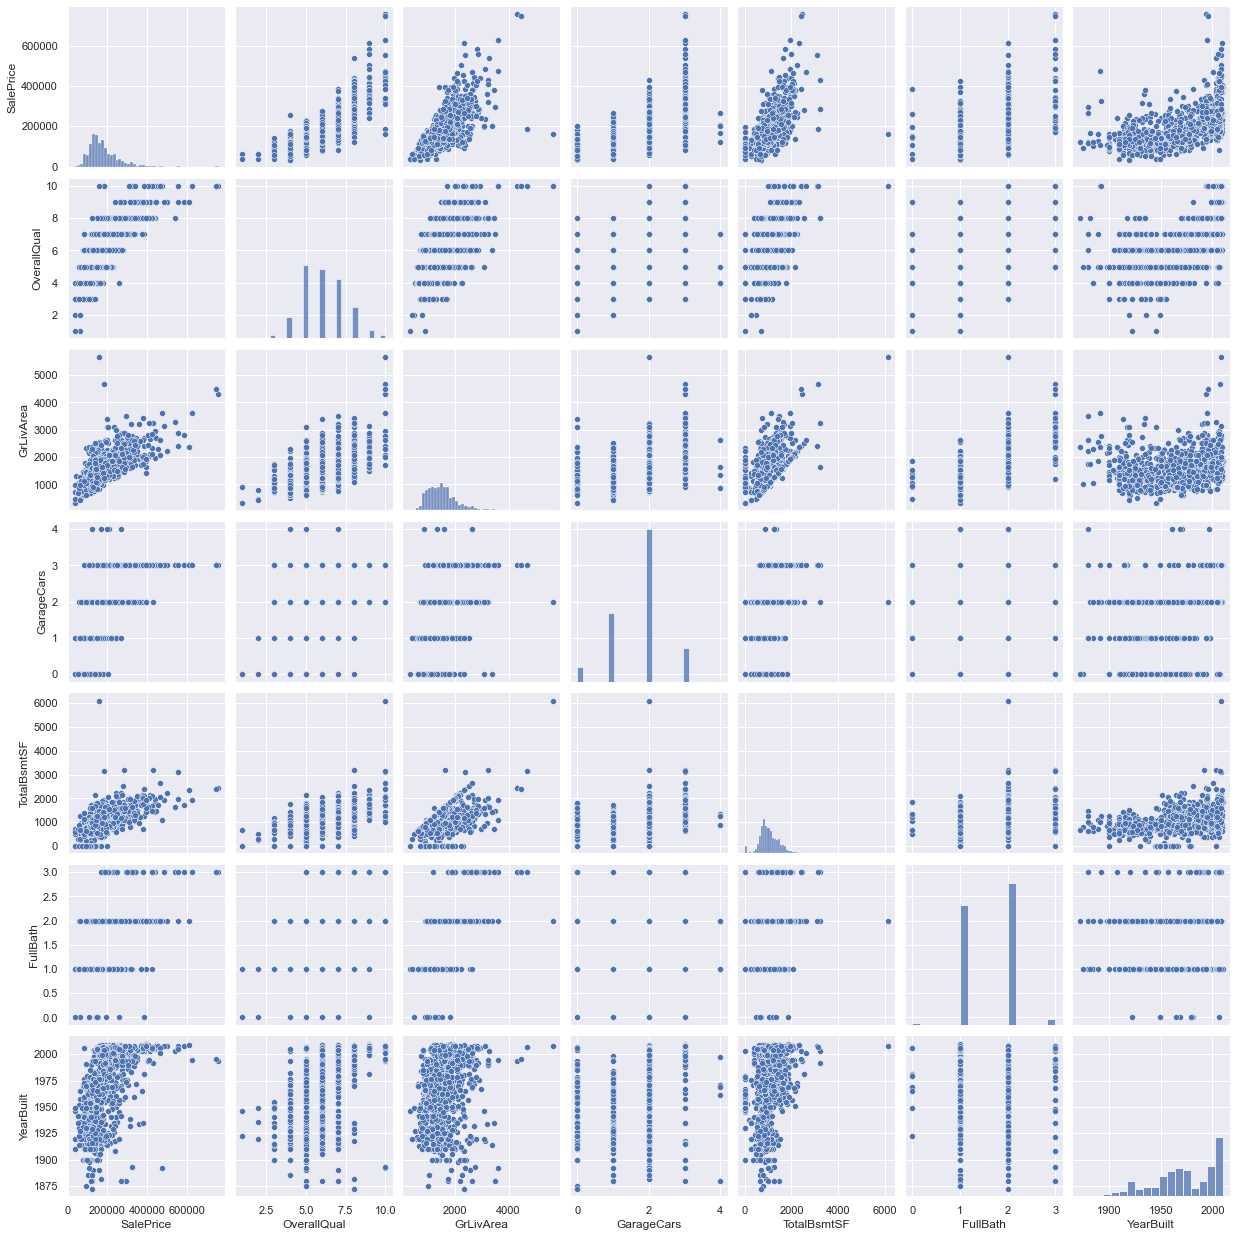

In [471]:
#Plotting pairplot for understanding relationship bwtween some of the correlated features
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dftrain[cols], size = 2.5)
plt.show()

<AxesSubplot:>

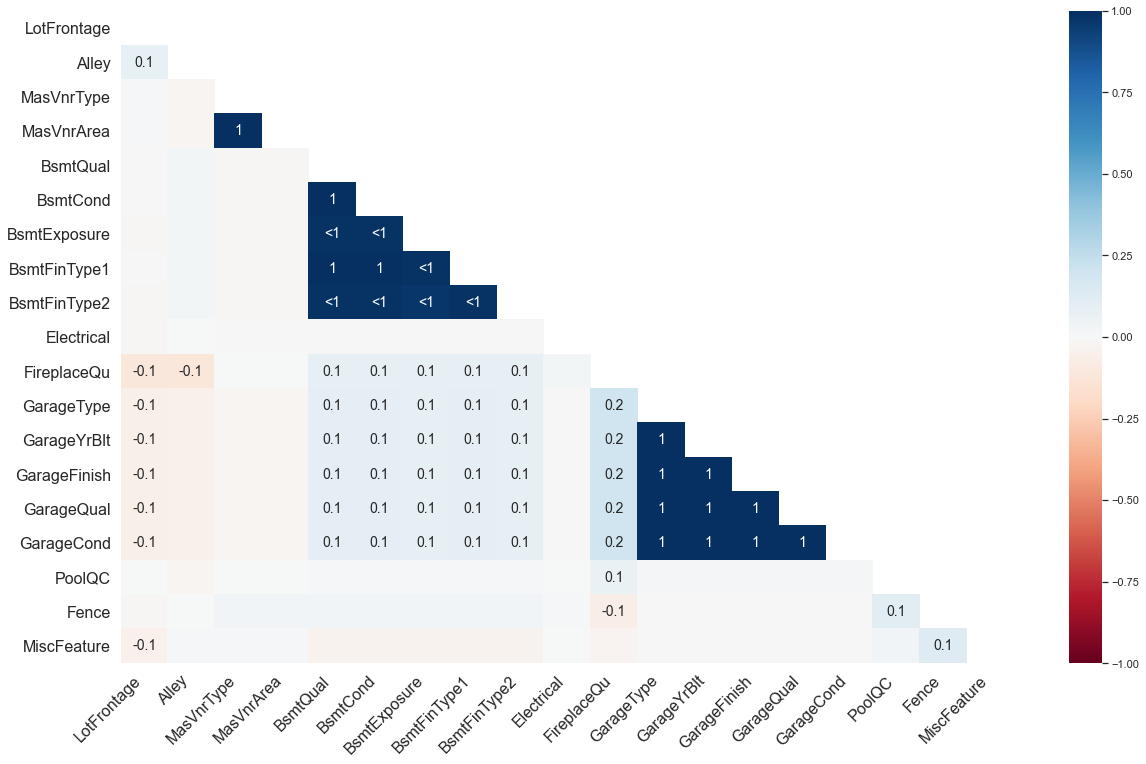

In [472]:
#Plotting corelation between missing valued columns
msn.heatmap(dftrain)
#A value near -1 means if one variable appears then the other variable is very likely to be missing.
#A value near 0 means there is no dependence between the occurrence of missing values of two variables.
#A value near 1 means if one variable appears then the other variable is very likely to be present.

# Pre Processing

## Missing Values Treatment

In [473]:
# divide the data into numerical ("quancol") and categorical ("catcol") features
quancol = list( dftest.loc[:,dftest.dtypes != 'object'].drop('Id',axis=1).columns.values )
catcol = list( dftest.loc[:,dftest.dtypes == 'object'].columns.values )

In [474]:
#Separate categorical and numerical columns
catcol_=df.select_dtypes(include=['object'])
quancol_=df.select_dtypes(include=[np.number]).drop("Id",axis=1)
catcol_.shape,quancol_.shape

((2919, 43), (2919, 37))

In [475]:
#Check for the null/missing values 
catcol_.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
KitchenQual        1
Electrical         1
RoofStyle          0
HouseStyle         0
dtype: int64

In [476]:
quancol_.isnull().sum().sort_values(ascending=False).head(12)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
dtype: int64

In [477]:
# Filling missing values for numerical features. Most of the NAN should mean that 
# the corresponding facillity/structure doesn't exist, so I use zero for most cases

df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)

# NAN should mean no garage. I temporarily use yr = 0 here. Will come back to this later. 
df.GarageYrBlt.fillna(0, inplace=True)

# Use zero
df.MasVnrArea.fillna(0, inplace=True)    
df.BsmtHalfBath.fillna(0, inplace=True)
df.BsmtFullBath.fillna(0, inplace=True)
df.GarageArea.fillna(0, inplace=True)
df.GarageCars.fillna(0, inplace=True)    
df.TotalBsmtSF.fillna(0, inplace=True)   
df.BsmtUnfSF.fillna(0, inplace=True)     
df.BsmtFinSF2.fillna(0, inplace=True)    
df.BsmtFinSF1.fillna(0, inplace=True)

In [478]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [479]:
# Filling missing values for categorical features
df.PoolQC.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)    
df.Alley.fillna('NA', inplace=True)          
df.Fence.fillna('NA', inplace=True)         
df.FireplaceQu.fillna('NA', inplace=True)    
df.GarageCond.fillna('NA', inplace=True)    
df.GarageQual.fillna('NA', inplace=True)     
df.GarageFinish.fillna('NA', inplace=True)   
df.GarageType.fillna('NA', inplace=True)     
df.BsmtExposure.fillna('NA', inplace=True)     
df.BsmtCond.fillna('NA', inplace=True)        
df.BsmtQual.fillna('NA', inplace=True)        
df.BsmtFinType2.fillna('NA', inplace=True)     
df.BsmtFinType1.fillna('NA', inplace=True)
#For below two columns it is already represented as None so iam filling missing values with "None"
df.MasVnrType.fillna('None', inplace=True)   
df.Exterior2nd.fillna('None', inplace=True) 

# These are general properties that all houses should have, so NANs probably 
# just mean the values were not recorded. I therefore use "mode", the most 
# common value to fill in
df.Functional.fillna(df.Functional.mode()[0], inplace=True)       
df.Utilities.fillna(df.Utilities.mode()[0], inplace=True)          
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)        
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)                
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)        
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)    

# MSZoning should highly correlate with the location, so I use the mode values of individual 
# Neighborhoods
for i in df.Neighborhood.unique():
    if df.MSZoning[df.Neighborhood == i].isnull().sum() > 0:
        df.loc[df.Neighborhood == i,'MSZoning'] = \
        df.loc[df.Neighborhood == i,'MSZoning'].fillna(df.loc[df.Neighborhood == i,'MSZoning'].mode()[0])

In [480]:
#For reference purpose what i have done in last step of previous block of code
#Filled with modes of different MSZone groups
df["Neighborhood"].groupby(df.MSZoning).agg(lambda x:x.value_counts().index[0]).reset_index()

,MSZoning,Neighborhood
0,C (all),IDOTRR
1,FV,Somerst
2,RH,SWISU
3,RL,NAmes
4,RM,OldTown


## Label Encoding

In [481]:
# These categorical features are "rank", so they can be transformed to 
# numerical features
df.Alley = df.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

# Update my lists of numerical and categorical features
newquancol = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
           'ExterCond','ExterQual','FireplaceQu','Functional','GarageCond',
           'GarageQual','HeatingQC','KitchenQual','LandSlope','PavedDrive','PoolQC',
           'Street','Utilities']
quancol = quancol + newquancol 
for i in newquancol: quancol.remove(i)


# This is actually a categorical feature
df.MSSubClass = df.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
                                   50:'class5', 60:'class6', 70:'class7', 75:'class8',
                                   80:'class9', 85:'class10', 90:'class11', 120:'class12',
                                   150:'class13', 160:'class14', 180:'class15', 190:'class16'})

# Keeping "YrSold" is enough
df=df.drop('MoSold',axis=1)

# Update my lists of numerical and categorical features
quancol.remove('MoSold')
quancol.remove('MSSubClass')
catcol.append('MSSubClass')

## Feature Engineering

In [482]:
df['Age'] = df.YrSold - df.YearBuilt
df['AgeRemod'] = df.YrSold - df.YearRemodAdd
df['AgeGarage'] = df.YrSold - df.GarageYrBlt

# For the houses without a Garage, I filled the NANs with zeros, which makes AgeGarage ~ 2000
# Here I replace their AgeGarage with the maximum value among the houses with Garages
max_AgeGarage = np.max(df.AgeGarage[df.AgeGarage < 1000])
df['AgeGarage'] = df['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

# Some of the values are negative because the work was done after the house 
# was sold. In these cases, I change them to zero to avoid negative ages.
df.Age = df.Age.map(lambda x: 0 if x < 0 else x)
df.AgeRemod = df.AgeRemod.map(lambda x: 0 if x < 0 else x)
df.AgeGarage = df.AgeGarage.map(lambda x: 0 if x < 0 else x)

# drop the original time variables 
df=df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

# update my list of numerical feature
for i in ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']: quancol.remove(i)
quancol = quancol + ['Age','AgeRemod','AgeGarage']

To prevent Dummy Variable trap I'am dropping last column of the dummy columns\
#First Iam creating list of dummy columns to drop. Later dropping them from data

In [483]:
# create of list of dummy variables that I will drop, which will be the last
# column generated from each categorical feature
dummy_drop = []
for i in catcol:
    dummy_drop += [ i+'_'+str(df[i].unique()[-1]) ]

# create dummy variables
df = pd.get_dummies(df,columns=catcol) 
#drop the last column generated from each categorical feature
df = df.drop(dummy_drop,axis=1)

In [484]:
#Separate train and test data from combined dataframe
X_train  = df[:-1459].drop(['SalePrice','Id'], axis=1)
y_train  = df[:-1459]['SalePrice']
X_test  = df[-1459:].drop(['SalePrice','Id'], axis=1)
#Scale the data
scaler = RobustScaler()
X_train[quancol]= scaler.fit_transform(X_train[quancol])
X_test[quancol]= scaler.transform(X_test[quancol])

X_train.shape, X_test.shape # now we have 272 features!

((1460, 272), (1459, 272))

## Feature Selection

In [487]:
#Using Xgbregressior for model selection
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)

print(imp)

                    Importance
OverallQual           0.223334
BsmtQual_5            0.150141
GarageCars            0.076485
LandSlope_3           0.051798
KitchenAbvGr          0.050560
...                        ...
Condition2_RRAn       0.000000
GarageType_Basment    0.000000
Condition2_RRNn       0.000000
ExterCond_1           0.000000
FireplaceQu_5         0.000000

[272 rows x 1 columns]


In [488]:
# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

# Define a function to calculate negative RMSE (as a score)
def nrmse(y_true, y_pred):
    return -1.0*rmse(y_true, y_pred)

neg_rmse = make_scorer(nrmse)

estimator = XGBRegressor()
selector = RFECV(estimator, cv = 3, n_jobs = -1, scoring = neg_rmse)
selector = selector.fit(X_train, y_train)

print("The number of selected features is: {}".format(selector.n_features_))

features_kept = X_train.columns.values[selector.support_] 
X_train = X_train[features_kept]
X_test = X_test[features_kept]


The number of selected features is: 37


In [489]:
features_kept

array(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PoolArea', 'Age', 'AgeRemod', 'MSZoning_C (all)', 'MSZoning_RM',
       'Alley_0', 'LandContour_Bnk', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_StoneBr',
       'Exterior1st_BrkFace', 'Exterior2nd_BrkFace', 'BsmtQual_3',
       'BsmtQual_5', 'BsmtExposure_4', 'BsmtFinType1_6', 'Heating_Grav',
       'CentralAir_Y', 'KitchenQual_3', 'KitchenQual_5', 'Functional_8',
       'GarageType_Attchd', 'GarageQual_3', 'SaleCondition_Abnorml',
       'MSSubClass_class2'], dtype=object)

## Fit Model

### Linear Regression Model

In [513]:
from sklearn.linear_model import LinearRegression


In [514]:
reg=LinearRegression()

In [515]:
regmodel=reg.fit(X_train,y_train)

In [519]:
regmodel.score(X_train,y_train)

0.8466565588700213

### Xgboost model

In [521]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [522]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 1000, alpha = 10, n_estimators = 90)


In [523]:
xgmodel=xg_reg.fit(X_train,y_train)

[17:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [524]:
xgmodel.score(X_train,y_train)

0.9999203745400852

In [529]:
predicttrain=xgmodel.predict(X_train)

In [526]:
predectxg=xgmodel.predict(X_test)

In [537]:
predectxg=pd.DataFrame(predectxg)

In [538]:
predectxg.to_csv("xgboost_final.csv")

# Model Evaluation

<AxesSubplot:ylabel='SalePrice'>

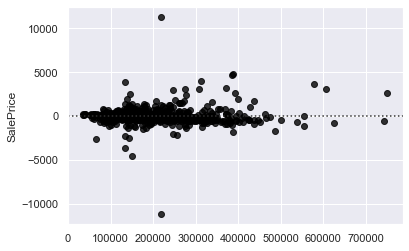

In [531]:
#Residual plot for analysis
sns.residplot(predicttrain,y_train,color='black')

In [520]:
from sklearn import metrics

In [532]:
#Evaluation metrics
print('MAE:', metrics.mean_absolute_error(predicttrain,y_train))
print('MSE:', metrics.mean_squared_error(predicttrain,y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(predicttrain,y_train)))

MAE: 267.3449887628425
MSE: 502180.94169369
RMSE: 708.647261826143
